# Pizza Hut Sales Data Analysis using SQL

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt


# Connect to the MySQL database
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shubhamdb2002', 
    database='pizzasales'
)
cursor = db.cursor()


# 1) Retrive total no of orders placed

total orders placed are 21350


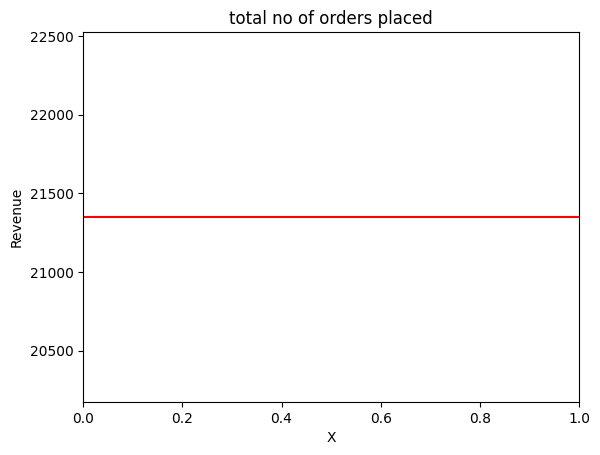

In [10]:
query= """ select count(order_id) as total_orders_placed from orders """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
print("total orders placed are",df[0][0])
y=df[0][0]
plt.axhline(y,color='r')
plt.title('total no of orders placed')
plt.xlabel('X')
plt.ylabel('Revenue')
plt.show()

# 2) Calculate the total revenue generated from pizza sales

total revenue generated is: 817860.0


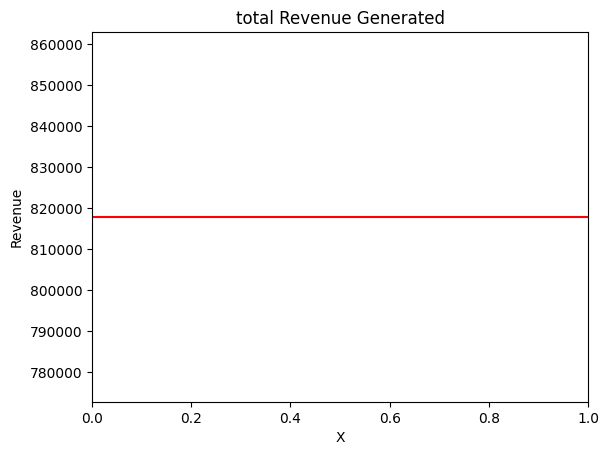

In [248]:
query= """ select round(sum(order_details.quantity *pizzas.price))from order_details join pizzas on order_details.pizza_id = pizzas.pizza_id  """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
print("total revenue generated is:",df[0][0])
y=df[0][0]
plt.axhline(y,color='r')
plt.title('total Revenue Generated')
plt.xlabel('X')
plt.ylabel('Revenue')
plt.show()

# 3)Identify highest priced pizza

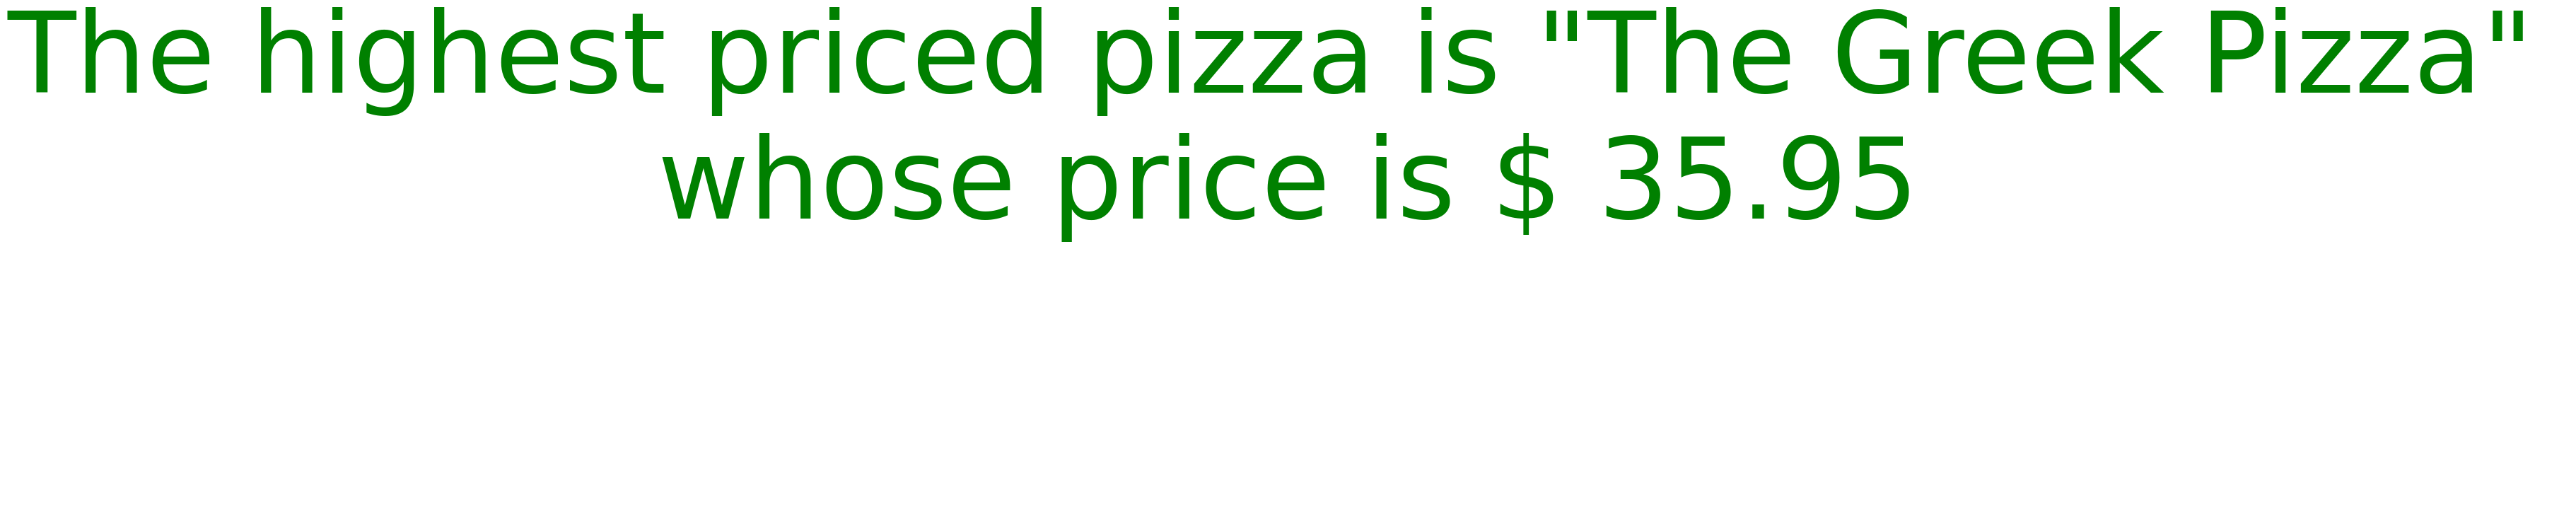

In [154]:
query= """ select pizza_types.name, pizzas.price from pizza_types join pizzas on pizza_types.pizza_type_id = pizzas.pizza_type_id order by pizzas.price desc 
          limit 1 """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
plt.text(0,1,f'The highest priced pizza is "{df[0][0]}" \nwhose price is $ {df[1][0]}',ha='center',va='bottom',fontsize=114,color='green')
plt.axis('off')
plt.show()


# 4) Identify most comman pizza sized ordered

The most comman pizza sized ordered is L whose quantity is 18526


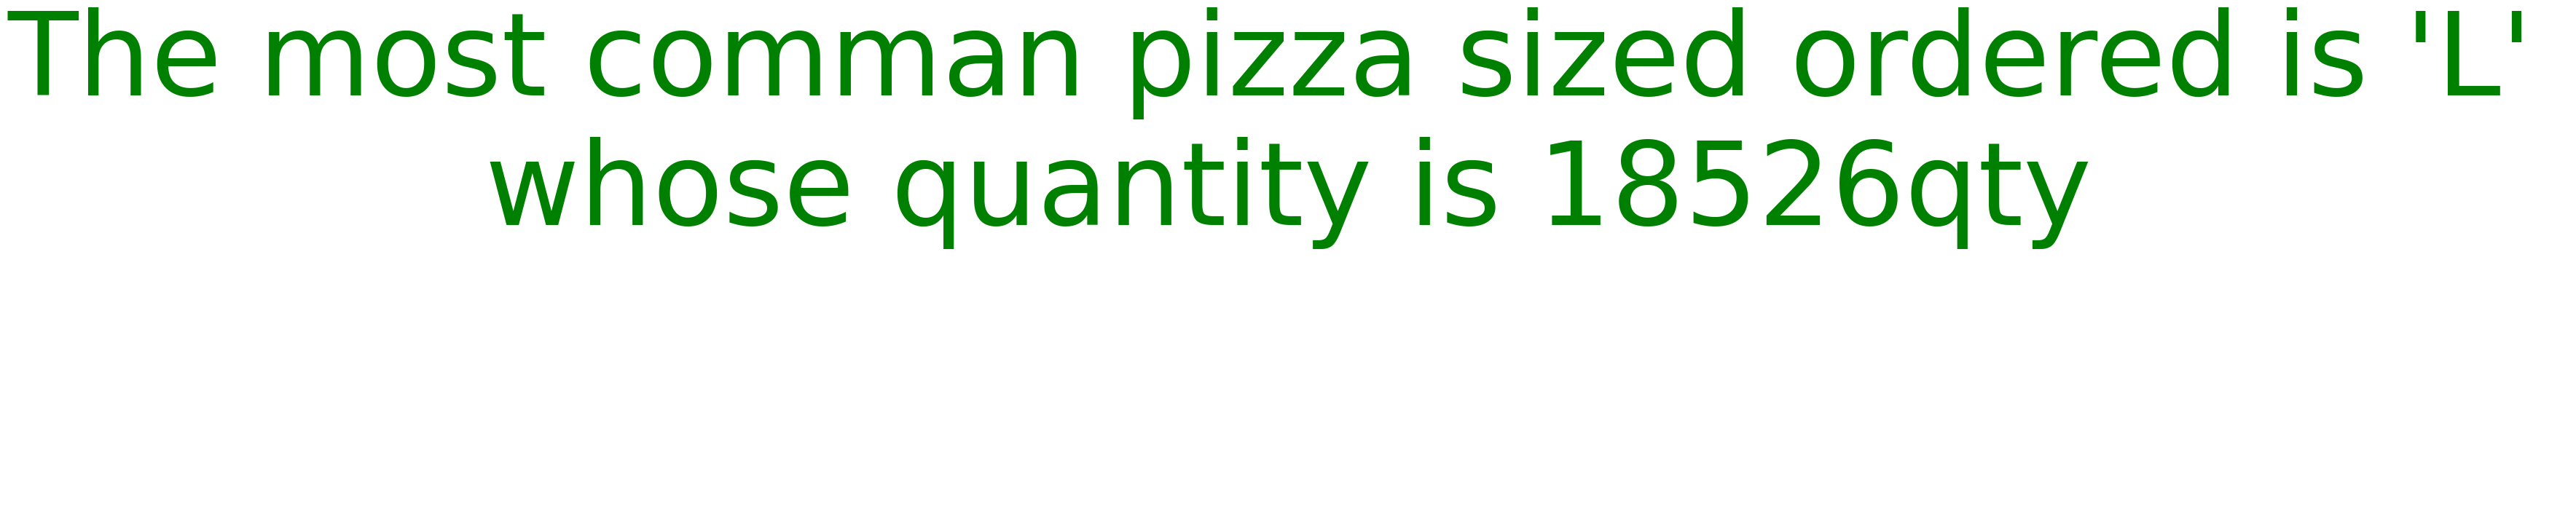

In [155]:
query= """ select  pizzas.size ,count(order_details.order_details_id) as cc from pizzas join order_details  on pizzas.pizza_id = order_details.pizza_id group by 
pizzas.size order by cc desc limit 1"""

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
df
print(f"The most comman pizza sized ordered is {df[0][0]} whose quantity is {df[1][0]}")
plt.text(0,1,f"The most comman pizza sized ordered is '{df[0][0]}' \nwhose quantity is {df[1][0]}qty",ha='center',va='bottom',fontsize=114,color='green')
plt.axis('off')
plt.show()

# 5) List the top 5 most ordered pizzas types along with their quantity

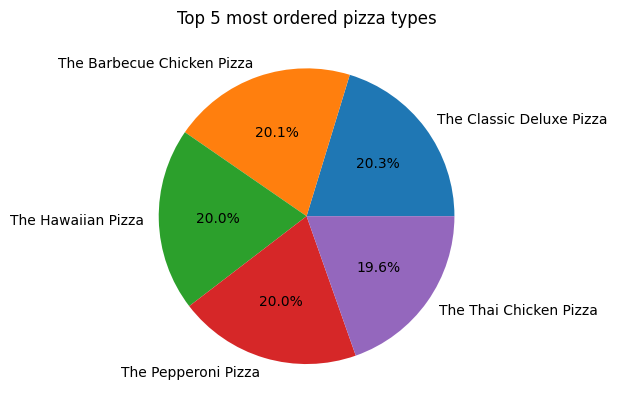

In [96]:
query= """select pizza_types.name,sum(order_details.quantity) as cc from pizza_types join pizzas on 
           pizza_types.pizza_type_id = pizzas.pizza_type_id join order_details on order_details.pizza_id=pizzas.pizza_id group by
           pizza_types.name order by cc desc limit 5
          
           """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
df
pizzatypes=df[0][:]
qty=df[1][:]

plt.pie(qty,labels=pizzatypes,autopct='%1.1f%%')
plt.title("Top 5 most ordered pizza types")
plt.show()

# 6) Distribution of orders by hour of the day

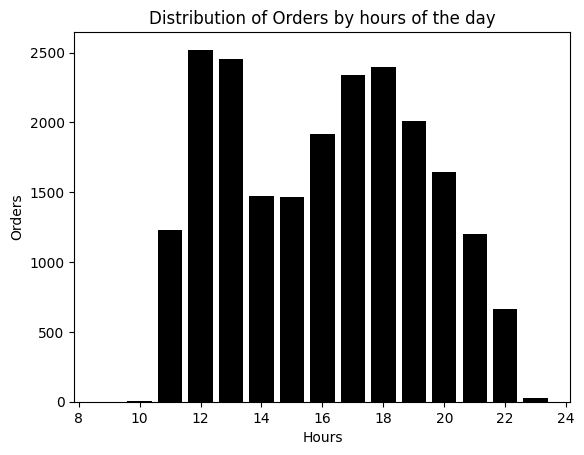

In [123]:
query=""" select hour(order_time),count(order_id) as cc from orders group by hour(order_time) order by cc desc"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
hours=df[0][:]
orders=df[1][:]
plt.bar(hours,orders,color="black")
plt.title('Distribution of Orders by hours of the day')
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.show()

# 7) Category wise distribution of pizzas

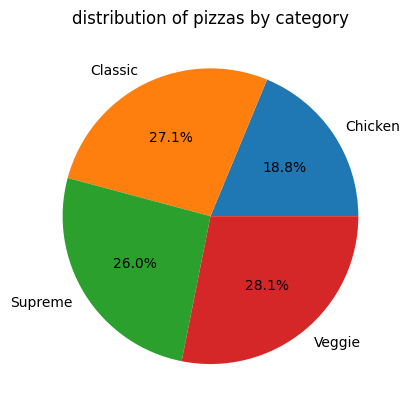

In [129]:
query=""" select pizza_types.category,count(pizzas.pizza_id)  from pizza_types join pizzas on pizzas.pizza_type_id=pizza_types.pizza_type_id
group by pizza_types.category  """
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
pizzas=df[0][:]
qty=df[1][:]
plt.pie(qty,labels=pizzas,autopct='%1.1f%%')
plt.title("distribution of pizzas by category")

plt.show()

# 8) Group the orders by date and calculate the average number of pizzas ordered per day

The average number of pizzas ordered per day is 138 


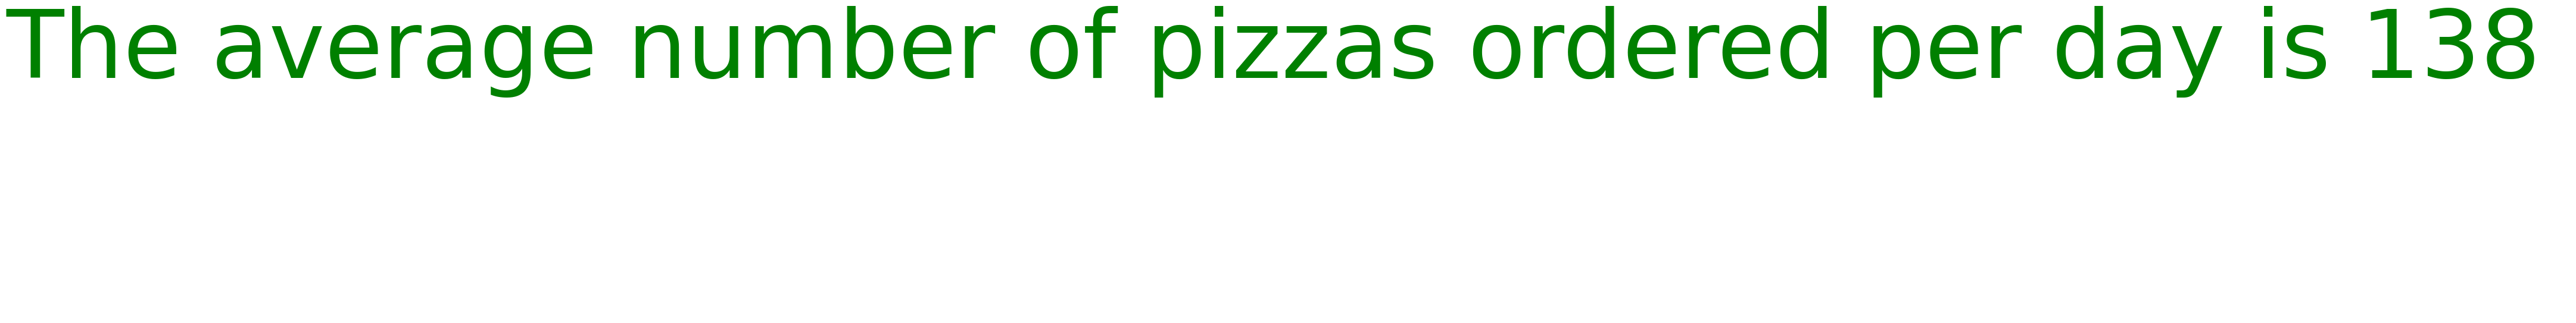

In [142]:
query=""" with myct as(select orders.order_date,sum(order_details.quantity) as av from orders join order_details on order_details.order_id=orders.order_id 
           group by  orders.order_date)
           select round(avg(av),0) from myct"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
df[0][0]
print(f"The average number of pizzas ordered per day is {df[0][0]} ")
plt.text(0,1,f"The average number of pizzas ordered per day is {df[0][0]} ",ha='center',va='bottom',fontsize=114,color='green')
plt.axis('off')
plt.show()

# 9)Top 3 pizzas based on revenue

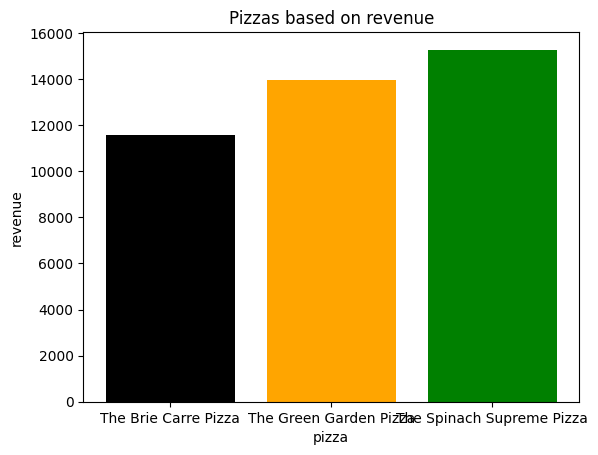

In [157]:
query=""" select pizza_types.name,sum(order_details.quantity*pizzas.price) as revenue from pizza_types join pizzas on
         pizzas.pizza_type_id=pizza_types.pizza_type_id join order_details on order_details.pizza_id=pizzas.pizza_id 
         group by pizza_types.name order by revenue asc limit 3"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
pizza=df[0][:]
revenue=df[1][:]
plt.bar(pizza,revenue,color=['black','orange','green'])
plt.title('Pizzas based on revenue')
plt.xlabel('pizza')
plt.ylabel('revenue')
plt.show()

# 10.Calculate the percentage contribution of each pizza type to total revenue

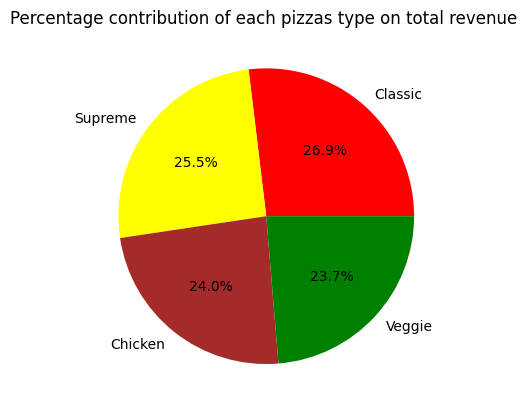

In [178]:
query=""" select pizza_types.category,sum((order_details.quantity*pizzas.price)/( select round(sum(order_details.quantity *pizzas.price))
          from order_details join pizzas on order_details.pizza_id = pizzas.pizza_id)*100)as revenue
          from pizza_types 
          join pizzas on pizzas.pizza_type_id=pizza_types.pizza_type_id 
          join order_details on order_details.pizza_id=pizzas.pizza_id 
          group by pizza_types.category order by revenue desc  """
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
pizza=df[0][:]
revenue=df[1][:]
plt.pie(revenue,labels=pizza,autopct='%1.1f%%',colors=['red','yellow','brown','green'])
plt.title('Percentage contribution of each pizzas type on total revenue ')
plt.show()

# 11. Analyze the Cumulative revenue generated over time

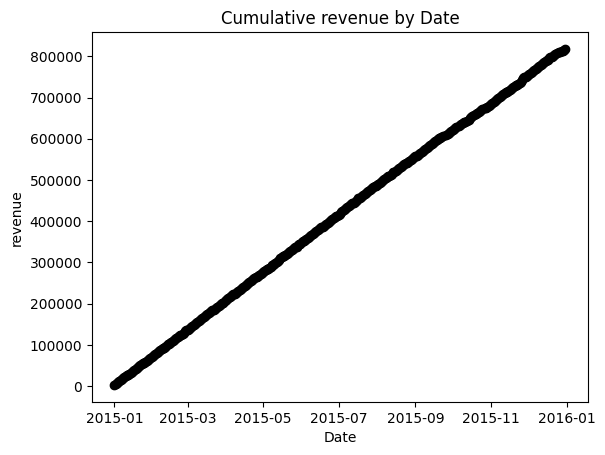

In [213]:
query="""select order_date,revenue,sum(revenue) over(order by order_date) as cum  from (select orders.order_date,sum(order_details.quantity*pizzas.price) as revenue from order_details  join pizzas on
         pizzas.pizza_id=order_details.pizza_id join orders on orders.order_id=order_details.order_id 
         group by orders.order_date) as sales"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
date=df[0][:]
revenue=df[2][:]
plt.scatter(date,revenue,color="black")
plt.title('Cumulative revenue by Date')
plt.xlabel('Date')
plt.ylabel('revenue')
plt.show()

# 12.Top selling pizzas based on each category revenue

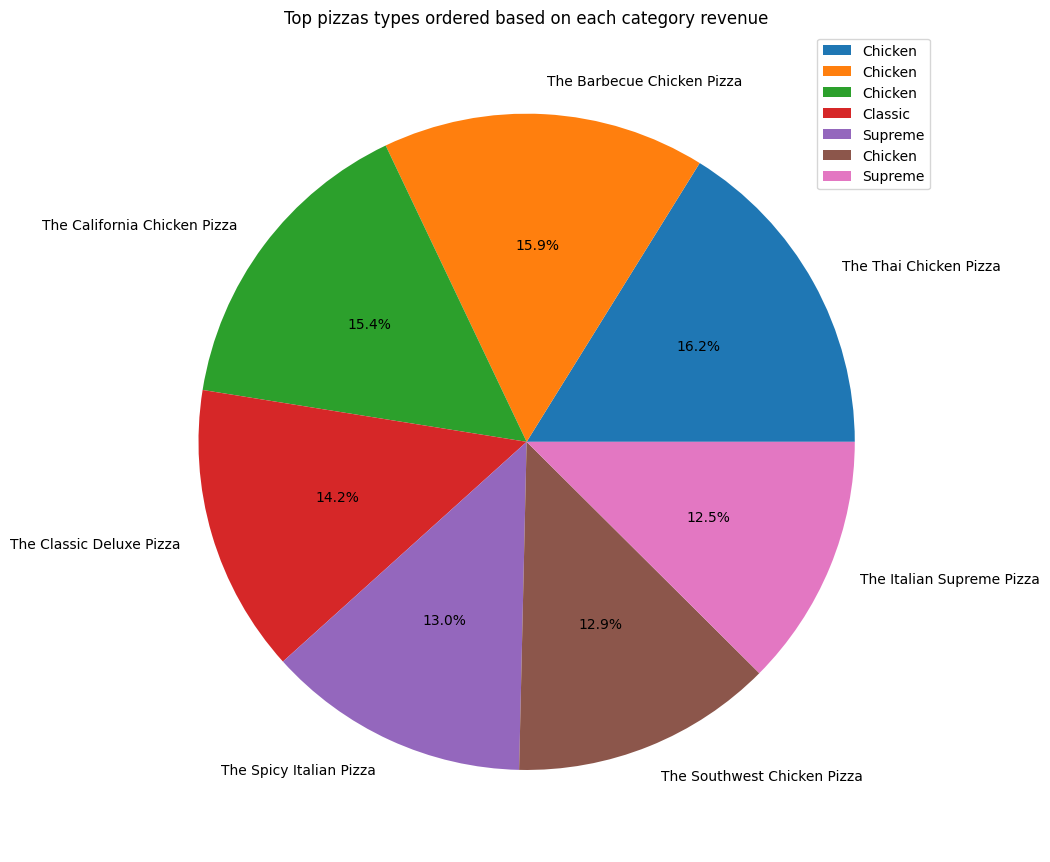

In [78]:
import seaborn as sns
query=""" (select pizza_types.category,pizza_types.name,sum(order_details.quantity*pizzas.price) as revenue from pizza_types  join pizzas on
         pizzas.pizza_type_id=pizza_types.pizza_type_id join order_details on order_details.pizza_id=pizzas.pizza_id 
         group by pizza_types.category,pizza_types.name order by revenue desc limit 7)"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data)
# sns.barplot(x='category',y='revenue',hue='pizza_name',data=df)
revenue=df[2][:]
category=df[0][:]
name=df[1][:]
plt.figure(figsize=(10,9))
plt.pie(revenue,labels=name,autopct='%1.1f%%')

plt.legend(category,loc='upper right')
plt.tight_layout()
plt.title('Top pizzas types ordered based on each category revenue')
plt.show()